# **EDA**

## Objectives

* Answer Business Requirement 1: “The client is interested to understand the patterns from the house sales dataset, to learn the most relevant variables that are correlated to house sale prices.”
    * Explore the main patterns in the housing dataset.
    * Identify the most relevant variables correlated with house sale prices.
    * Generate visualizations to support insights.
    * Prepare insights for use in the Streamlit app answering Business Requirement 1.

## Inputs

* `outputs/datasets/collection/house_prices_records.csv`: cleaned and curated dataset with house sale records.
* `outputs/datasets/collection/inherited_houses.csv`: dataset containing inherited properties the client owns.

## Outputs

* Printed top correlated variables to `SalePrice` using Pearson and Spearman correlation.
* Visualizations (scatter plots, box plots) of most correlated features.
* Optional parallel plot for multidimensional categorical visualization. 

## Additional Comments
- We decided not to combine the two CSVs, instead analyzed the main dataset (`house_prices_records.csv`) and kept `inherited_houses.csv` for prediction later.

---

# Change working directory

In [1]:
import os
current_dir = os.getcwd()
current_dir

'/workspaces/milestone-project-heritage-housing-issues/jupyter_notebooks'

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


In [3]:
current_dir = os.getcwd()
current_dir

'/workspaces/milestone-project-heritage-housing-issues'

---

# Load Data

In [4]:
import pandas as pd

# Load the pre-processed datasets from outputs
df_main = pd.read_csv("outputs/datasets/collection/house_prices_records.csv")
df_client = pd.read_csv("outputs/datasets/collection/inherited_houses.csv")

print("🏠 Main dataset:")
display(df_main.head())

print("🏘️ Inherited properties:")
display(df_client.head())

🏠 Main dataset:


,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtExposure,BsmtFinSF1,BsmtFinType1,BsmtUnfSF,EnclosedPorch,GarageArea,GarageFinish,...,LotFrontage,MasVnrArea,OpenPorchSF,OverallCond,OverallQual,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,SalePrice
0,856,854.0,3.0,No,706,GLQ,150,0.0,548,RFn,...,65.0,196.0,61,5,7,856,0.0,2003,2003,208500
1,1262,0.0,3.0,Gd,978,ALQ,284,NaN,460,RFn,...,80.0,0.0,0,8,6,1262,NaN,1976,1976,181500
2,920,866.0,3.0,Mn,486,GLQ,434,0.0,608,RFn,...,68.0,162.0,42,5,7,920,NaN,2001,2002,223500
3,961,NaN,NaN,No,216,ALQ,540,NaN,642,Unf,...,60.0,0.0,35,5,7,756,NaN,1915,1970,140000
4,1145,NaN,4.0,Av,655,GLQ,490,0.0,836,RFn,...,84.0,350.0,84,5,8,1145,NaN,2000,2000,250000


🏘️ Inherited properties:


,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtExposure,BsmtFinSF1,BsmtFinType1,BsmtUnfSF,EnclosedPorch,GarageArea,GarageFinish,...,LotArea,LotFrontage,MasVnrArea,OpenPorchSF,OverallCond,OverallQual,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd
0,896,0,2,No,468.0,Rec,270.0,0,730.0,Unf,...,11622,80.0,0.0,0,6,5,882.0,140,1961,1961
1,1329,0,3,No,923.0,ALQ,406.0,0,312.0,Unf,...,14267,81.0,108.0,36,6,6,1329.0,393,1958,1958
2,928,701,3,No,791.0,GLQ,137.0,0,482.0,Fin,...,13830,74.0,0.0,34,5,5,928.0,212,1997,1998
3,926,678,3,No,602.0,GLQ,324.0,0,470.0,Fin,...,9978,78.0,20.0,36,6,6,926.0,360,1998,1998


# Data Exploration

In [5]:
from ydata_profiling import ProfileReport

profile = ProfileReport(df_main, minimal=True)
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Temporary Encoding Categorical Features

In [6]:
from sklearn.preprocessing import LabelEncoder

df_encoded = df_main.copy()
categorical_cols = df_encoded.select_dtypes(include=['object']).columns

le = LabelEncoder()
for col in categorical_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))


# Correlation Study

In [7]:
# Pearson correlation
corr_pearson = df_encoded.corr(method='pearson')['SalePrice'].sort_values(key=abs, ascending=False)[1:11]
print("📊 Top Pearson correlations:\n", corr_pearson)

# Spearman correlation
corr_spearman = df_encoded.corr(method='spearman')['SalePrice'].sort_values(key=abs, ascending=False)[1:11]
print("📊 Top Spearman correlations:\n", corr_spearman)

📊 Top Pearson correlations:
 OverallQual     0.790982
GrLivArea       0.708624
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
KitchenQual    -0.589189
YearBuilt       0.522897
YearRemodAdd    0.507101
GarageYrBlt     0.486362
MasVnrArea      0.477493
Name: SalePrice, dtype: float64
📊 Top Spearman correlations:
 OverallQual     0.809829
GrLivArea       0.731310
YearBuilt       0.652682
GarageArea      0.649379
TotalBsmtSF     0.602725
GarageYrBlt     0.593788
1stFlrSF        0.575408
YearRemodAdd    0.571159
KitchenQual    -0.569857
OpenPorchSF     0.477561
Name: SalePrice, dtype: float64


In [8]:
# Combine top variables from both methods
top_n = 5
top_vars = list(set(corr_pearson[:top_n].index.to_list() + corr_spearman[:top_n].index.to_list()))
print("Variables to investigate:", top_vars)

Variables to investigate: ['GrLivArea', 'TotalBsmtSF', '1stFlrSF', 'GarageArea', 'OverallQual', 'YearBuilt']


## Visualising Relationships with SalesPrice

## Scatter & Box Plots for Top Features

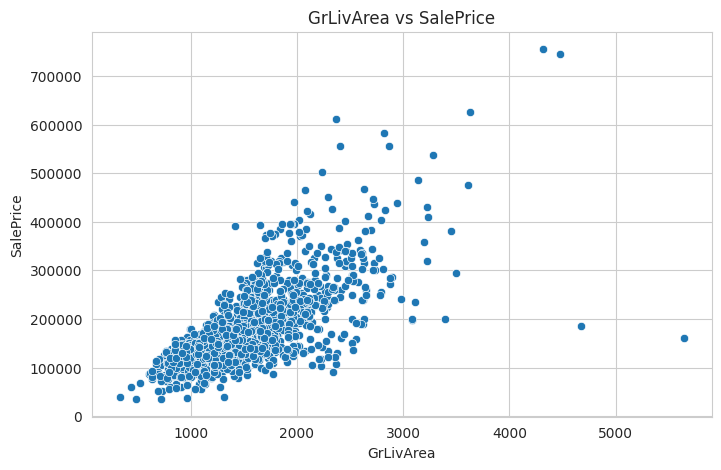

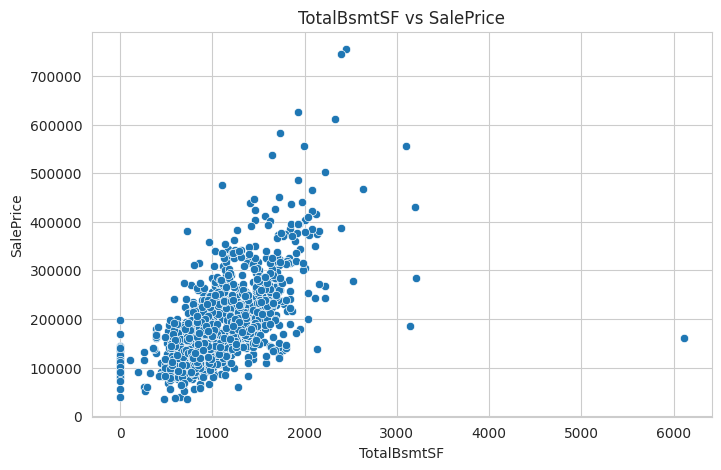

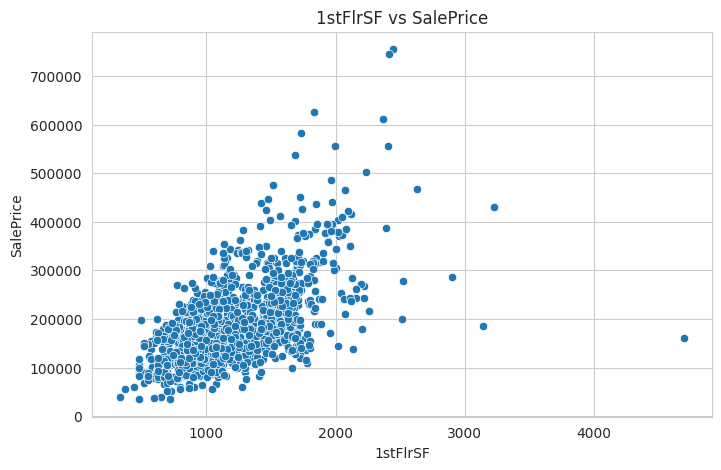

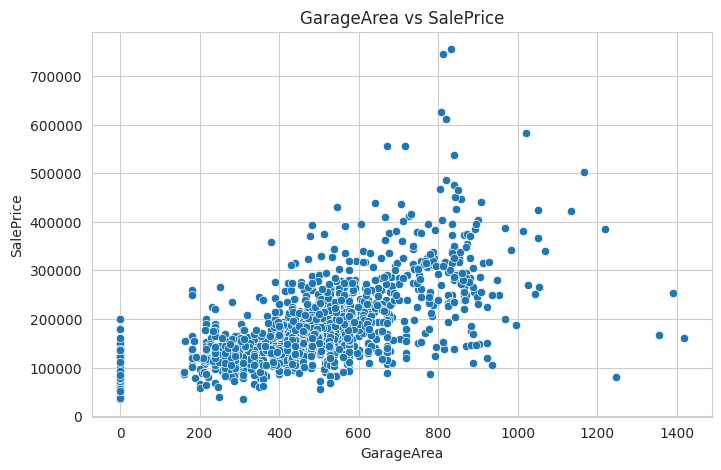

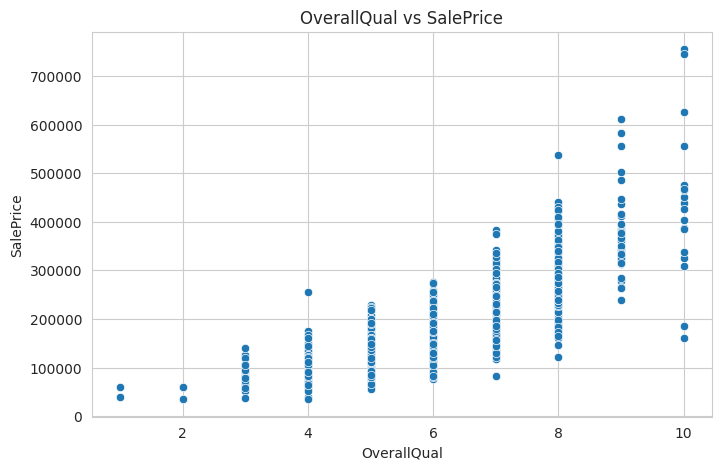

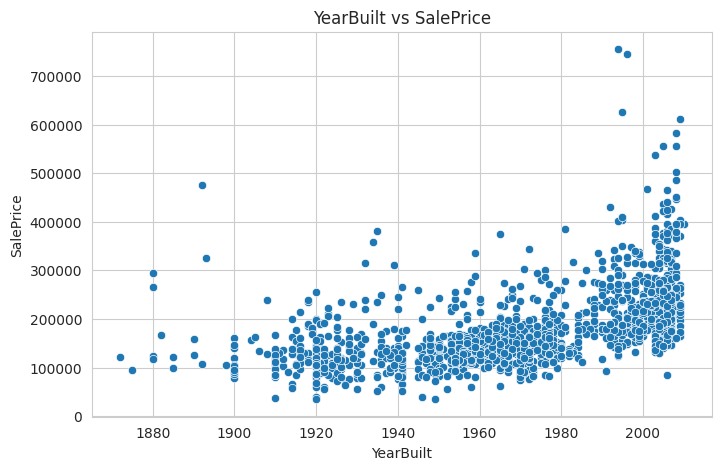

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style('whitegrid')

def plot_categorical(df_main, col, target_var):
    plt.figure(figsize=(12, 5))
    sns.boxplot(data=df_main, x=col, y=target_var)
    plt.xticks(rotation=90)
    plt.title(f"{col} vs {target_var}")
    plt.show()

def plot_numerical(df_main, col, target_var):
    plt.figure(figsize=(8, 5))
    sns.scatterplot(data=df_main, x=col, y=target_var)
    plt.title(f"{col} vs {target_var}")
    plt.show()

target_var = 'SalePrice'

for col in top_vars:
    if df_encoded[col].dtype == 'object':
        plot_categorical(df_main, col, target_var)
    else:
        plot_numerical(df_main, col, target_var)

---

# Parallel  Plot

In [10]:
from feature_engine.discretisation import ArbitraryDiscretiser
import plotly.express as px
%matplotlib inline

# Example for 'OverallQual' binning
var_to_bin = 'OverallQual' if 'OverallQual' in df_encoded.columns else top_vars[0]

quality_map = [-np.Inf, 4, 6, 8, np.Inf]
disc = ArbitraryDiscretiser(binning_dict={var_to_bin: quality_map})
df_parallel = disc.fit_transform(df_encoded[top_features + ['SalePrice']].copy())

# Rename bins
labels_map = {
    0: "<4", 1: "4-6", 2: "6-8", 3: "8+"
}
df_parallel[var_to_bin] = df_parallel[var_to_bin].replace(labels_map)

fig = px.parallel_categories(df_parallel, color="SalePrice", color_continuous_scale='Viridis')
fig.show(renderer='notebook')

NameError: name 'np' is not defined

---

# Conclusion

## Conclusions and Next Steps

- We identified strong correlations between several numerical features and `SalePrice`, such as `OverallQual`, `GrLivArea`, and `GarageArea`.
- Several categorical variables like `Neighborhood`, `KitchenQual`, and `GarageFinish` are likely important but need proper encoding.
- We will now move to the **Data Cleaning Notebook**, where we will:
  - Handle missing values
  - Drop or transform irrelevant or problematic features
  - Prepare the dataset for modeling

Outputs from this notebook:
- A good understanding of variable relationships
- `df_main` ready for cleaning and transformation in the next step


---

# Push files to Repo

In [ ]:
import os

try:
    os.makedirs(name='outputs/datasets/cleaned', exist_ok=True)
except Exception as e:
    print(e)

# Save the combined dataset to be cleaned in the next notebook
df_main.to_csv("outputs/datasets/cleaned/df_main_for_cleaning.csv", index=False)